In [1]:
%local-changes

I0919 104344.239 local_changes_provider.py:32] Initializing local changes support for repo_base_path='/data/sandcastle/boxes/fbsource'
W0919 104349.053 local_changes_magic.py:256] 
___________ Recommended Action ___________ 
Your current repo doesn't match the kernel commit.
While autoreload often functions as expected, ensuring consistency is key,
especially when your local repo significantly diverges from the kernel commit or you're tackling production workflows.
Consider one of the following options:

1) From commandline, run: hg checkout 3b72cdb1977841e5055891190b52444fea2565e8 to develop without building a local kernel.
2) To develop in your current repo, first build the local kernel(e.g, bento kernel build bento/kernels:bento_kernel_~). Afterwards, iterate development using %local-changes.
___________________________________________ 

W0919 104349.054 local_changes_magic.py:428] 
___________________ FYI __________________ 
A debugger is off. If you aim to debug, activate `%local-

### Task: Find the best model for 60 days
You got 10 tries to find the best architecture


#### input format

arch: [[]] 

#### input ranges
layer sizes: 64 - 2048

layers: 1-5

sub_arches 1-5 

training_days: 60

example:
arch =[[64, 64]]
1 sub_arch
2 layers wtih 64 layersize each


#### Evaluation:

qps need to be > 3500
score is calculated by % improvement from BASELINE_NE

    #def get_score(self, ne: float) -> float:
    #    baseline_ne = self.model_config_dict["BASELINE_NE"]
    #    return (baseline_ne - ne) / baseline_ne



# sample code

```python
from admarket.ads_copilot.common.training_simulation.model_performance_api import  ModelPerformanceAPI

model = ModelPerformanceAPI()
config = model.get_default_model_config_dict()
config["GLOBAL_NOISE_SCALE"] = 0.0
model = ModelPerformanceAPI(config)
ne, qps, curve = model.train_model(training_days= 60, arch=[[64,64]],ignore_budget=True)
model.get_score(ne)
```
we will go back and forth, 

you will give me an arch suggested

i will give you ne and qps for 60days

In [18]:
# sample usage
from admarket.ads_copilot.common.training_simulation.model_performance_api import  ModelPerformanceAPI

In [19]:
model = ModelPerformanceAPI()
config = model.get_default_model_config_dict()
config["GLOBAL_NOISE_SCALE"] = 0.0
model = ModelPerformanceAPI(config)
results = {}

def score(arch):
    ne, qps, curve = model.train_model(training_days= 60, arch = arch,ignore_budget=True)
    return  model.get_score(ne),ne, qps, curve

# tries 1-10

In [20]:
#1

arch = [[512, 512]]
out,ne, qps, curve = score(arch)
print(out)
print(ne)
print(qps)
#print(curve)
results[str(arch)] = (out,qps)


-0.01749336020889899
0.5695094256240317
32214.75966610524


In [21]:
#2
arch = [[1024, 1024, 512]]
out,ne, qps, curve = score(arch)
print(out)
print(ne)
print(qps)
#print(curve)
results[str(arch)] = (out,qps)


0.012585664758148214
0.552673651650237
15146.38120681553


In [22]:
#3
arch = [[1024, 1024], [512, 512]]
out,ne, qps, curve = score(arch)
print(out)
print(ne)
print(qps)
#print(curve)
results[str(arch)] = (out,qps)


0.03159529800877088
0.5420336163072418
12810.657273064313


In [23]:
#4
arch = [[1024, 1024, 512], [512, 512, 256], [256, 256]]
out,ne, qps, curve = score(arch)
print(out)
print(ne)
print(qps)
#print(curve)
results[str(arch)] = (out,qps)

0.04838395837394564
0.532636699633894
11874.902299599982


In [24]:
#5
arch = [[2048, 1024, 512], [1024, 512, 256], [512, 256], [256, 128]]
out,ne, qps, curve = score(arch)
print(out)
print(ne)
print(qps)
#print(curve)
results[str(arch)] = (out,qps)

0.08937636212602837
0.5096925102870427
7398.4538407999125


In [25]:
#6
arch = [[2048, 2048, 1024, 512, 256], [1024, 512, 256], [512, 256], [256, 128], [128, 64]]
out,ne, qps, curve = score(arch)
print(out)
print(ne)
print(qps)
#print(curve)
results[str(arch)] = (out,qps)

0.12083215043539229
0.49208613698457804
4711.954223390472


In [26]:
#7
arch = [[1536, 1024, 512, 256], [1024, 512, 256], [512, 256], [256, 128], [128, 64]]
out,ne, qps, curve = score(arch)
print(out)
print(ne)
print(qps)
#print(curve)
results[str(arch)] = (out,qps)

0.07950397635142412
0.5152182630554729
8870.34444899329


In [27]:
#8
arch = [[1792, 1280, 768, 384], [1024, 512, 256], [512, 256], [256, 128], [128, 64]]
out,ne, qps, curve = score(arch)
print(out)
print(ne)
print(qps)
#print(curve)
results[str(arch)] = (out,qps)

0.10489373453103965
0.5010071564644312
6796.5132568360195


In [28]:
#9
arch = [[2048, 1536, 1024, 512, 256], [1024, 512, 256], [512, 256], [256, 128], [128, 64]]
out,ne, qps, curve = score(arch)
print(out)
print(ne)
print(qps)
#print(curve)
results[str(arch)] = (out,qps)

0.11994064339815777
0.49258512958794104
5530.548710407279


In [29]:
#10 - cheating
arch = [[2048, 1536, 1024, 768, 512, 256], [1024, 512, 256], [512, 256], [256, 128], [128, 64]]
out,ne, qps, curve = score(arch)
print(out)
print(ne)
print(qps)
#print(curve)
results[str(arch)] = (out,qps)

0.12059338926467845
0.4922197759276043
5156.940891439319


In [32]:
results
result_df = pd.DataFrame.from_dict(results, orient='index')
result_df.columns = ['ne', 'qps']

result_df = result_df[result_df.qps>3500]['ne']
result_df 

[[512, 512]]                                                                               -0.017493
[[1024, 1024, 512]]                                                                         0.012586
[[1024, 1024], [512, 512]]                                                                  0.031595
[[1024, 1024, 512], [512, 512, 256], [256, 256]]                                            0.048384
[[2048, 1024, 512], [1024, 512, 256], [512, 256], [256, 128]]                               0.089376
[[2048, 2048, 1024, 512, 256], [1024, 512, 256], [512, 256], [256, 128], [128, 64]]         0.120832
[[1536, 1024, 512, 256], [1024, 512, 256], [512, 256], [256, 128], [128, 64]]               0.079504
[[1792, 1280, 768, 384], [1024, 512, 256], [512, 256], [256, 128], [128, 64]]               0.104894
[[2048, 1536, 1024, 512, 256], [1024, 512, 256], [512, 256], [256, 128], [128, 64]]         0.119941
[[2048, 1536, 1024, 768, 512, 256], [1024, 512, 256], [512, 256], [256, 128], [128, 64]]   

[Text(0, 0, '[[512, 512]]'),
 Text(1, 0, '[[1024, 1024, 512]]'),
 Text(2, 0, '[[1024, 1024], [512, 512]]'),
 Text(3, 0, '[[1024, 1024, 512], [512, 512, 256], [256, 256]]'),
 Text(4, 0, '[[2048, 1024, 512], [1024, 512, 256], [512, 256], [256, 128]]'),
 Text(5, 0, '[[2048, 2048, 1024, 512, 256], [1024, 512, 256], [512, 256], [256, 128], [128, 64]]'),
 Text(6, 0, '[[1536, 1024, 512, 256], [1024, 512, 256], [512, 256], [256, 128], [128, 64]]'),
 Text(7, 0, '[[1792, 1280, 768, 384], [1024, 512, 256], [512, 256], [256, 128], [128, 64]]'),
 Text(8, 0, '[[2048, 1536, 1024, 512, 256], [1024, 512, 256], [512, 256], [256, 128], [128, 64]]'),
 Text(9, 0, '[[2048, 1536, 1024, 768, 512, 256], [1024, 512, 256], [512, 256], [256, 128], [128, 64]]')]

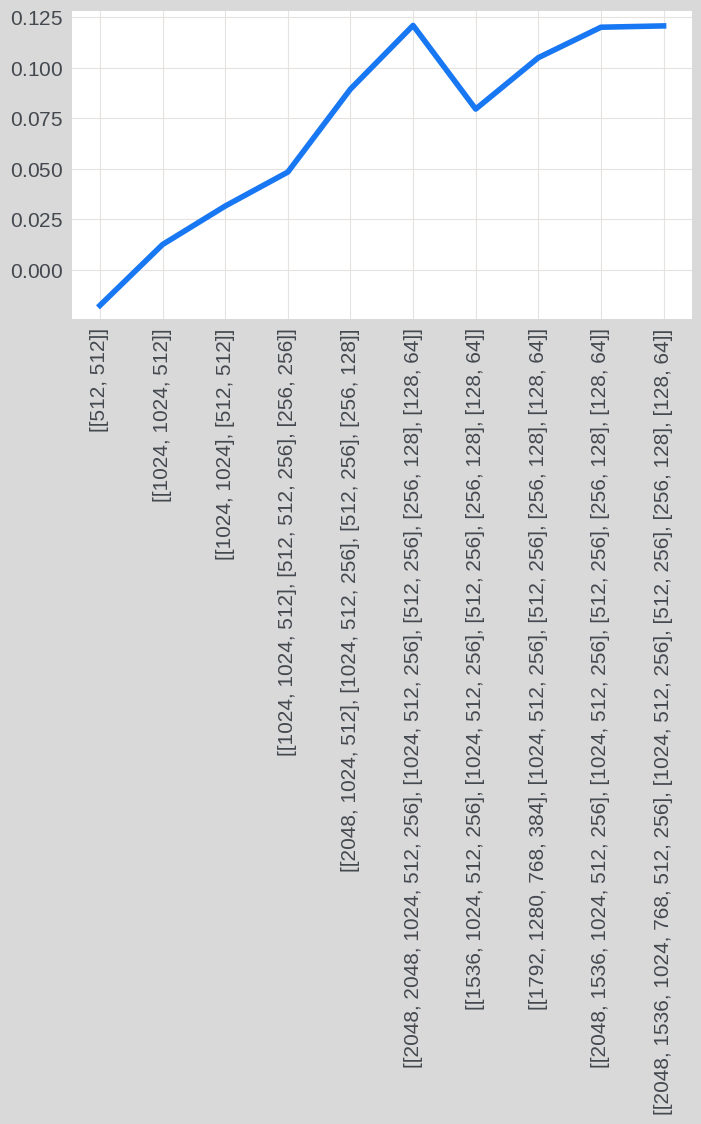

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
#result_df = pd.DataFrame.from_dict(results, orient='index')
plot_df = result_df
ax = plot_df.plot(figsize=(8, 4))
# Set tick marks for all data points
ax.set_xticks(range(len(plot_df)))  # 0 to 9 for 10 points
ax.set_xticklabels(plot_df.index, rotation=90)  # Use your index as labels, rotated 90 degrees


In [ ]:
print(result_df)